# Dependency

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

Prepare the dataset

In [2]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# List of appliance columns
appliance_columns = ['Fans', 'Lights', 'Freezes', 'Microwave Oven', 'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove']
unit_columns =  [col for col in data.columns if 'unit' in col]

# Replace NaN with 0 in appliance columns
data[appliance_columns] = data[appliance_columns].fillna(0)

# Convert all columns to numeric, coercing any invalid values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

 KS

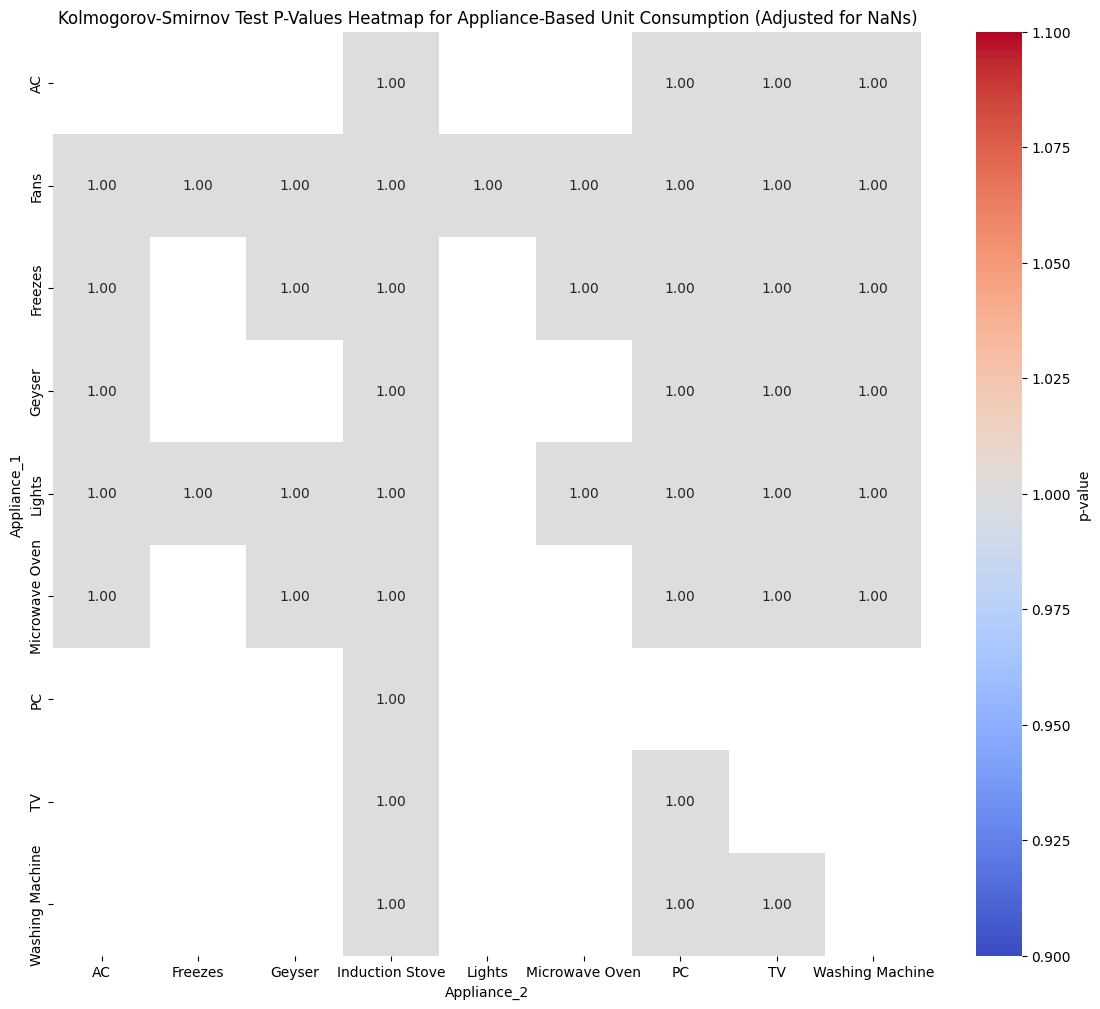

Appliance_2,AC,Freezes,Geyser,Induction Stove,Lights,Microwave Oven,PC,TV,Washing Machine
Appliance_1,,,,,,,,,
AC,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
Fans,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Freezes,1.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0
Geyser,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0
Lights,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
Microwave Oven,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0
PC,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
TV,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
Washing Machine,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN


In [3]:
# Calculate the total unit consumption for each customer, dropping NaN values in unit columns
data['total_unit_consumption'] = data[unit_columns].sum(axis=1, skipna=True)

# Perform Kolmogorov-Smirnov (K-S) test for each pair of appliances based on total unit consumption
ks_results = []

for col1, col2 in itertools.combinations(appliance_columns, 2):
    # Filter data to include only customers who have both appliances
    filter_data = data[(data[col1] > 0) & (data[col2] > 0)]
    ks_stat, p_value = ks_2samp(filter_data['total_unit_consumption'], filter_data['total_unit_consumption'])
    ks_results.append((col1, col2, p_value))

# Convert results to DataFrame for better visualization
ks_results_df = pd.DataFrame(ks_results, columns=['Appliance_1', 'Appliance_2', 'p_value'])

# Pivot the DataFrame for heatmap visualization
ks_pivot_df = ks_results_df.pivot(index='Appliance_1', columns='Appliance_2', values='p_value')

# Visualize the K-S test p-values using a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(ks_pivot_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'p-value'})
plt.title("Kolmogorov-Smirnov Test P-Values Heatmap for Appliance-Based Unit Consumption (Adjusted for NaNs)")
plt.savefig('ks_test_p_values_heatmap.png')
plt.show()

# Save the results DataFrame to a CSV file
ks_pivot_df.to_csv('ks_pivot.csv', index=False)

# Print the results DataFrame
ks_pivot_df

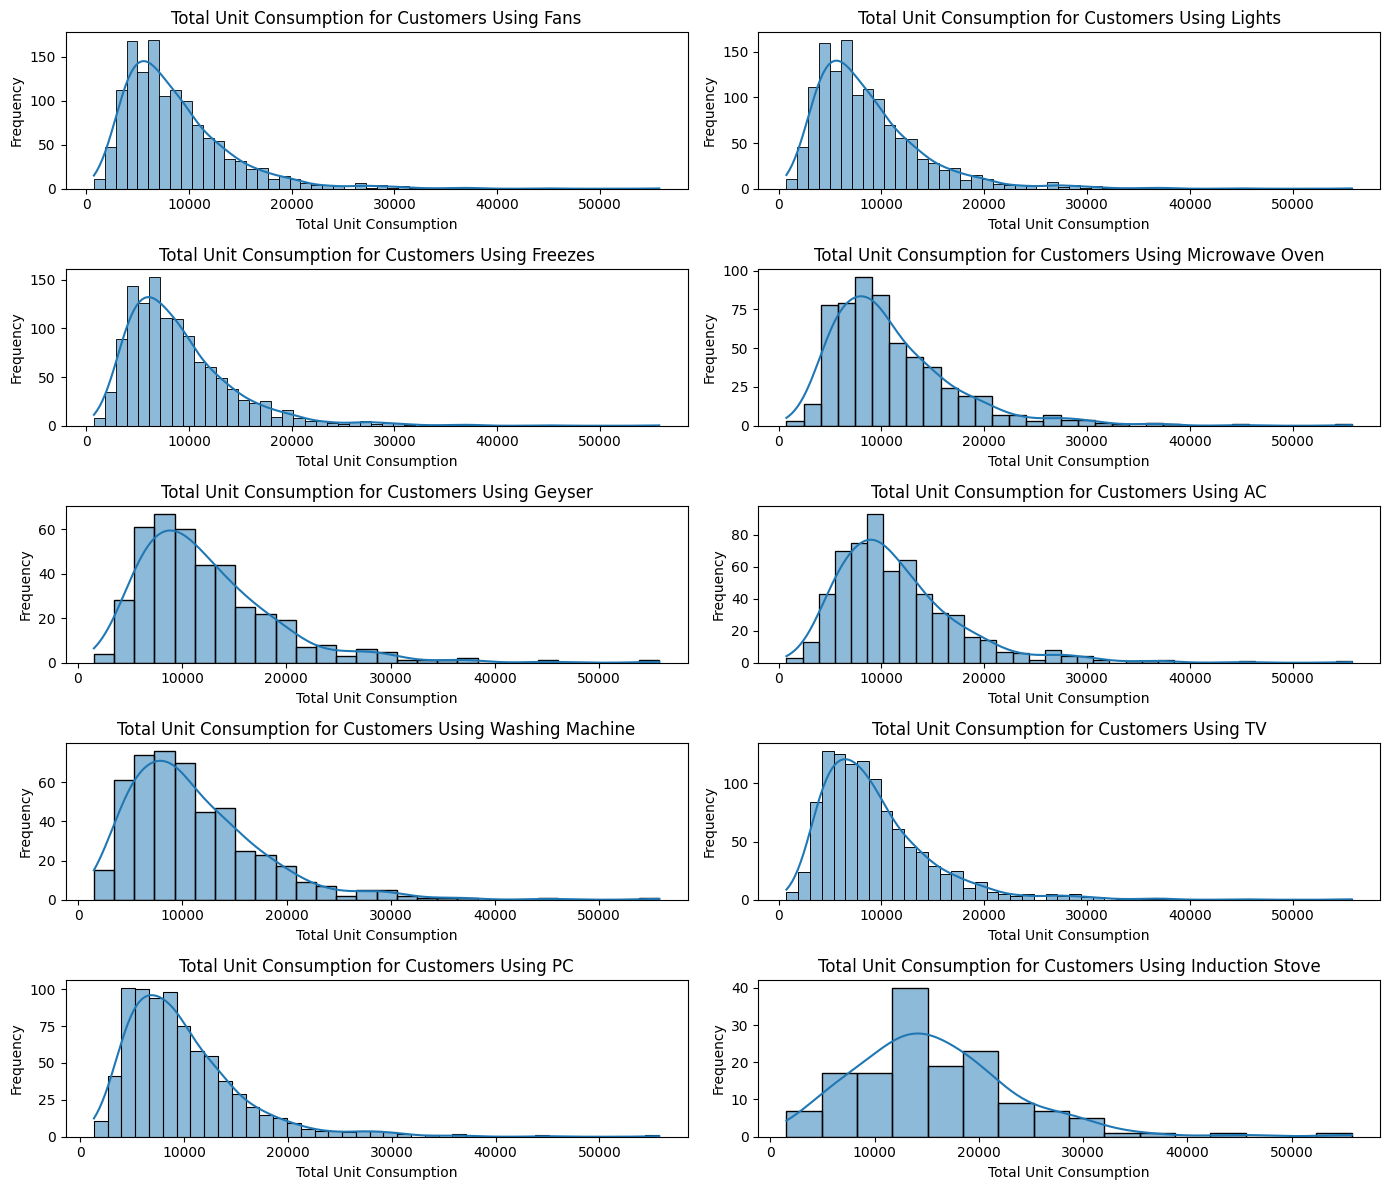

,Appliance_1,Appliance_2,p_value
0,Fans,Lights,1.0
1,Fans,Freezes,1.0
2,Fans,Microwave Oven,1.0
3,Fans,Geyser,1.0
4,Fans,AC,1.0
5,Fans,Washing Machine,1.0
6,Fans,TV,1.0
7,Fans,PC,1.0
8,Fans,Induction Stove,1.0
9,Lights,Freezes,1.0


In [4]:

# Additional visualizations: Histograms for each appliance's unit consumption
plt.figure(figsize=(14, 12))
for i, appliance in enumerate(appliance_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data[data[appliance] > 0]['total_unit_consumption'], kde=True)
    plt.title(f'Total Unit Consumption for Customers Using {appliance}')
    plt.xlabel('Total Unit Consumption')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('appliance_unit_consumption_histograms.png')
plt.show()

# Save the K-S test results to a CSV file
ks_results_df.to_csv('ks_test_results.csv', index=False)

# Print the K-S test results DataFrame
ks_results_df